In [45]:
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

In [46]:
df = pd.read_csv("./dataset/Train_data.csv")

y_train = df["class"]
X_train = df.drop(columns=["class"])

num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()

test_df = pd.read_csv("./dataset/Test_data.csv")
X_test = test_df[num_cols + cat_cols]

In [47]:
num_pipeline = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="mean")),
    ("scale", MinMaxScaler())
])

cat_pipeline = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("one-hot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

col_trans = ColumnTransformer(transformers=[
    ("num_pipeline", num_pipeline, num_cols),
    ("cat_pipeline", cat_pipeline, cat_cols)
],
remainder="drop",
n_jobs=-1
)

random_forest_classifier = RandomForestClassifier(random_state=42)
model_pipeline = Pipeline(steps=[
    ("col_trans", col_trans),
    ("model", random_forest_classifier)
])

In [48]:
model_pipeline.fit(X_train, y_train)
y_pred = model_pipeline.predict(X_test)

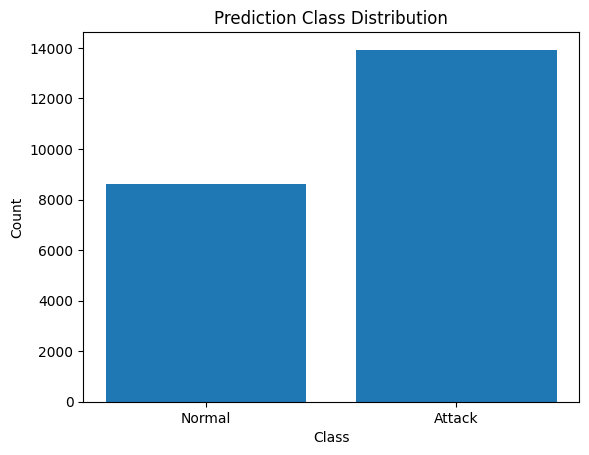

In [49]:
unique, counts = np.unique(y_pred, return_counts=True)

plt.bar(unique.astype(str), counts)
plt.xticks([0, 1], labels=["Normal", "Attack"])
plt.title("Prediction Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()